In [14]:
# !pip3 install google-cloud-aiplatform --upgrade --user

In [20]:
project_number = "455727625972"
endpoint_id = "5598634043798192128"
from google.cloud import aiplatform

endpoint = aiplatform.Endpoint(
    endpoint_name="projects/" + project_number + "/locations/us-central1/endpoints/" + endpoint_id
)

In [21]:
endpoint_name="projects/455727625972/locations/us-central1/endpoints/"+endpoint_id
endpoint_name

'projects/455727625972/locations/us-central1/endpoints/5598634043798192128'

In [22]:
import opendatasets as od
import pandas as pd
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

In [23]:
text = '''{"username":"abhimanyubhatia","key":"28595f163876d80cea2c8c6443264cc2"}'''

with open('kaggle.json', mode='w') as file:
    file.write(text)

dataset_url = 'https://www.kaggle.com/datasets/techsash/waste-classification-data'
od.download(dataset_url, force=True)

100%|██████████| 427M/427M [00:01<00:00, 298MB/s] 


In [24]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('waste-classification-data/DATASET/TEST',
                                            target_size = (64, 64),
                                            batch_size = 1,
                                            color_mode= "rgb",
                                            class_mode= "categorical")

Found 2513 images belonging to 2 classes.


In [25]:
test_x, test_y = test_set.__getitem__(1)

labels = (test_set.class_indices)
labels = dict((v,k) for k,v in labels.items())

In [26]:
test_x_list = test_x.tolist()
test_y_list = test_y.tolist()

In [27]:
labels

{0: 'O', 1: 'R'}

In [28]:
predictions = endpoint.predict(instances=test_x_list)
y_predicted = np.argmax(predictions.predictions, axis=1)
# labels[y_predicted[0]]

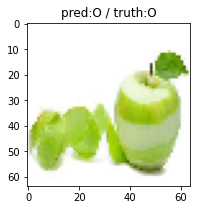

In [29]:
plt.figure(figsize=(3, 3))
# for i in range(16):
#     plt.subplot(4, 4, i+1)
plt.title('pred:%s / truth:%s' % (labels[(y_predicted[0])], labels[np.argmax(test_y[0])]))
plt.imshow(test_x[0])